interference.gif

In [ ]:
# Corrected code to show both constructive and destructive interference

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the x-axis range and number of points
x = np.linspace(0, 4 * np.pi, 1000)

# Define wave parameters
wave_amplitude = 1
wavelength = 2 * np.pi

# Define a function to update the plot for each frame
def update(frame):
    # Change the phase of the second wave to vary between 0 (constructive) and pi (destructive)
    phase_shift = np.pi * np.sin(frame * np.pi / 20)

    # Calculate the individual waves
    wave1 = wave_amplitude * np.sin(x * 2 * np.pi / wavelength)
    wave2 = wave_amplitude * np.sin(x * 2 * np.pi / wavelength + phase_shift)

    # Calculate the interference pattern
    interference_pattern = wave1 + wave2

    # Update the data for all three lines
    lines['wave1'].set_ydata(wave1)
    lines['wave2'].set_ydata(wave2)
    lines['interference'].set_ydata(interference_pattern)

# Create the figure and the two subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Initialize the plots for each wave and the interference pattern
lines = {}
lines['wave1'], = axes[1].plot(x, np.zeros_like(x), label='Wave 1')
lines['wave2'], = axes[1].plot(x, np.zeros_like(x), label='Wave 2 (changing phase)')
lines['interference'], = axes[0].plot(x, np.zeros_like(x), label='Interference Pattern')

# Formatting the plots
for ax in axes:
    ax.legend()
    ax.set_ylim(-2.5, 2.5)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_title('Interference Pattern')
axes[1].set_title('Individual Waves')
axes[2].set_title('Phase Shift Over Time')

# Plot for phase shift over time
phase_line, = axes[2].plot([], [], label='Phase Shift')
axes[2].set_ylim(-1, 1)
axes[2].legend()

# Function to initialize the animation
def init():
    phase_line.set_data([], [])
    for line in lines.values():
        line.set_ydata(np.zeros_like(x))
    return [phase_line] + list(lines.values())

# Update function for the animation
def animate(i):
    update(i)
    phase_shift = np.pi * np.sin(i * np.pi / 20)
    phase_line.set_data(x, np.sin(i * np.pi / 20) * np.ones_like(x))
    return [phase_line] + list(lines.values())

# Animate the plot
ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

# Save the animation as a GIF
ani.save('./interference.gif', writer='imagemagick', fps=10)

# Close the plot to prevent it from displaying statically
plt.close()

destructive_interference.gif

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parametry fal
length = 1000  # Liczba punktów na wykresie
x = np.linspace(0, 4 * np.pi, length)  # Zakres x od 0 do 4 Pi
wavelength = 2 * np.pi  # Długość fali, 2 Pi oznacza jedno pełne oscylacje na 2 Pi jednostek

# Fala nr 1
wave1 = np.sin(x * 2 * np.pi / wavelength)

# Fala nr 2 - przesunięta o Pi (180 stopni), co prowadzi do interferencji destruktywnej
wave2 = np.sin(x * 2 * np.pi / wavelength + np.pi)

# Suma obu fal
resulting_wave = wave1 + wave2

# Ustawienia wykresu
fig, ax = plt.subplots()
line1, = ax.plot(x, wave1, label='Fala 1')
line2, = ax.plot(x, wave2, label='Fala 2')
line3, = ax.plot(x, resulting_wave, label='Interferencja destruktywna', color='k')
ax.set_ylim(-2, 2)
plt.legend()

# Funkcja animacji
def animate(i):
    phase_shift = i * np.pi / 20  # stopniowo zmieniające się przesunięcie fazy
    wave2 = np.sin(x * 2 * np.pi / wavelength + np.pi + phase_shift)
    resulting_wave = wave1 + wave2
    line2.set_ydata(wave2)
    line3.set_ydata(resulting_wave)

# Tworzenie animacji
ani = animation.FuncAnimation(fig, animate, frames=40, interval=50, blit=False)

# Zapisywanie do pliku GIF
ani.save('./destructive_interference.gif', writer='imagemagick', fps=20)

plt.close()

NameError: name 'Button' is not defined

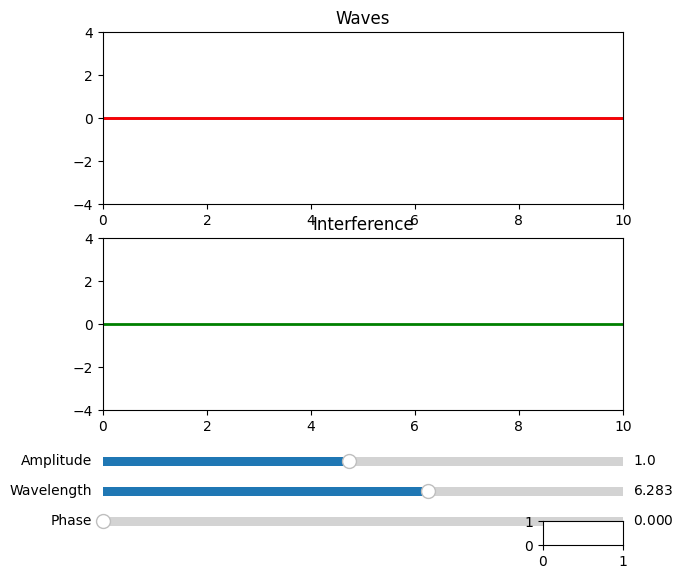

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Initial parameters
initial_wavelength = 2 * np.pi
initial_amplitude = 1
initial_phase = 0

# Create the figure and the line that we will manipulate
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)
ax_wave1, ax_wave2 = axes
t = np.linspace(0, 10, 1000)
wave1_line, = ax_wave1.plot(t, np.zeros_like(t), lw=2)
wave2_line, = ax_wave1.plot(t, np.zeros_like(t), lw=2, color='red')
interference_line, = ax_wave2.plot(t, np.zeros_like(t), lw=2, color='green')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the wavelength.
axcolor = 'lightgoldenrodyellow'
ax_wavelength = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
wavelength_slider = Slider(ax=ax_wavelength, label='Wavelength', valmin=0.1, valmax=10.0, valinit=initial_wavelength)

# Make a vertical slider to control the amplitude.
ax_amplitude = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
amplitude_slider = Slider(ax=ax_amplitude, label='Amplitude', valmin=0.1, valmax=2.0, valinit=initial_amplitude, orientation="horizontal")

# Make another slider to control the phase.
ax_phase = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
phase_slider = Slider(ax=ax_phase, label='Phase', valmin=0, valmax=2 * np.pi, valinit=initial_phase, orientation="horizontal")

# The function to be called anytime a slider's value changes
def update(val):
    wavelength = wavelength_slider.val
    amplitude = amplitude_slider.val
    phase = phase_slider.val
    wave1 = amplitude * np.sin(2 * np.pi / wavelength * t)
    wave2 = amplitude * np.sin(2 * np.pi / wavelength * t + phase)
    interference = wave1 + wave2
    wave1_line.set_ydata(wave1)
    wave2_line.set_ydata(wave2)
    interference_line.set_ydata(interference)
    fig.canvas.draw_idle()

# register the update function with each slider
wavelength_slider.on_changed(update)
amplitude_slider.on_changed(update)
phase_slider.on_changed(update)

# Set the layout of the plots and sliders
ax_wave1.margins(x=0)
ax_wave2.margins(x=0)
ax_wave1.set_title('Waves')
ax_wave2.set_title('Interference')

# Set the range of y-axis for the interference plot to be more visible
ax_wave1.set_ylim(-4, 4)
ax_wave2.set_ylim(-4, 4)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial parameters.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    wavelength_slider.reset()
    amplitude_slider.reset()
    phase_slider.reset()
button.on_clicked(reset)

plt.show()